In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 -4*x +5

In [4]:
f(3.0)

20.0

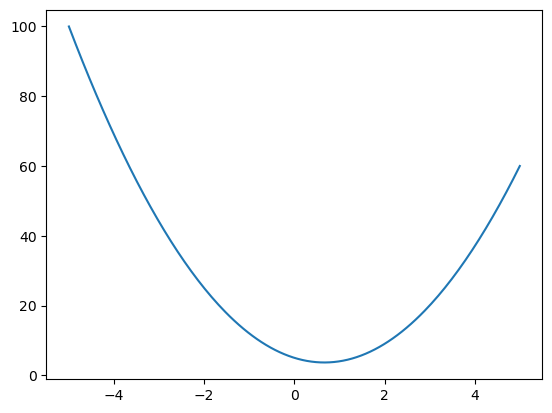

In [5]:
xs = np.linspace(-5,5,200)
ys = f(xs)
plt.plot(xs,ys)
plt.show()

In [6]:
# to find the derivation of a fucntion we will use the derivation formula useing limits

def der(f,x):
    h = 0.00000001
    return (f(x+h)-f(x))/h

In [7]:
der(f, 3)


14.00000009255109

In [8]:
der(np.sin, 2)

-0.4161468392105405

In [9]:
# lets get more complex
a = 2.0
b = -3.0
c = 10.0
d= a*b +c
d

4.0

In [10]:
h = 0.0000001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
a+=h
d2= a*b+c
print(d1, d2)
# AS d2< d1 this means that slopw needs to be negatice
print(f'slope is {(d2-d1)/h}')

4.0 3.9999997
slope is -2.9999999995311555


In [11]:
h = 0.0000001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
b+=h
d2= a*b+c
print(d1, d2)
# AS d2> d1 this means that slopw needs to be positive
print(f'slope is {(d2-d1)/h}')

4.0 4.0000002
slope is 1.9999999967268423


In [12]:
h = 0.0000001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
c+=h
d2= a*b+c
print(d1, d2)
# AS d2>d1 this means that slopw needs to be positive
print(f'slope is {(d2-d1)/h}')

4.0 4.000000099999999
slope is 0.999999993922529


In [13]:
# class Value:
#     def __init__(self,data, _children = (), _op = '', label = ''):
#         self.data = data
#         self._prev = set(_children)
#         self._op = _op
#         self.label = label
#         self.grad = 0.0 # for taking into account the gradient

#     def __repr__(self):
#         return f"Value(data = {self.data})"

#     def __add__(self, other):
#         out = Value(self.data+other.data, (self,other), '+')
#         return out

#     def __mul__(self,other):
#         out = Value(self.data*other.data, (self, other), '*')
#         return out

#     def tanh(self):
#         x= self.data
#         t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
#         out = Value(t,(self,),'tanh')
#         return out

In [14]:
class Value:
    def __init__(self,data, _children = (), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0 # for taking into account the gradient
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        other = other if 
        out = Value(self.data+other.data, (self,other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self,other):
        out = Value(self.data*other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data *out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x= self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t,(self,),'tanh')
        def _backward():
            self.grad = (1-t**2) * out.grad
        out._backward = _backward
        return out
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [15]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b
e.label = 'e'
d = e+c
d.label = 'd'
f = Value(-2.0,label = 'f')
L = f*d
L.label = 'L'


In [16]:
!pip install graphviz

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [17]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)

    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr = {'rankdir':'LR'}) # LR -> Left to Right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape = 'record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid+n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2))+n2._op)

    return dot

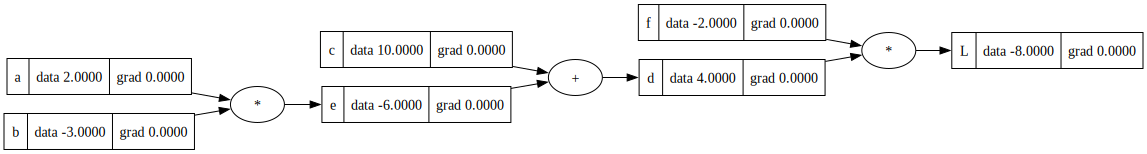

In [18]:
# here grad is differentiatation of that term with respect to L
draw_dot(L)

In [19]:
def lol():

    h = 0.0001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L2 = L.data + h

    
    print('Differentiation of L with respect to L',(L2-L1)/h)

lol() 

Differentiation of L with respect to L 0.9999999999976694


In [20]:
L.grad = 1.0

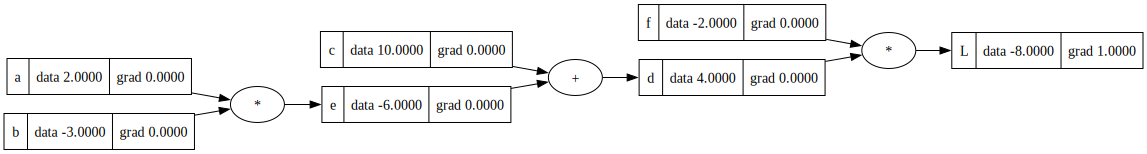

In [21]:
draw_dot(L)

In [22]:
def lol():

    h = 0.0001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    f = Value(-2.0+h,label = 'f')
    L = f*d
    L.label = 'L'
    L2 = L.data

    
    print('Differentiation of L with respect to f',(L2-L1)/h)

lol() 

Differentiation of L with respect to f 3.9999999999995595


In [23]:
f.grad = 4.0

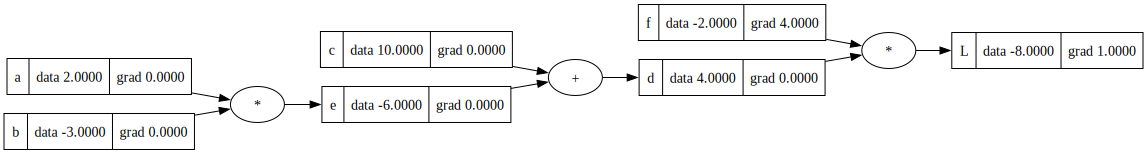

In [24]:
draw_dot(L)

In [25]:
def lol():

    h = 0.0001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    d.data +=h
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L2 = L.data

    
    print('Differentiation of L with respect to d',(L2-L1)/h)

lol() 

Differentiation of L with respect to d -1.9999999999953388


In [26]:
d.grad = -2.00

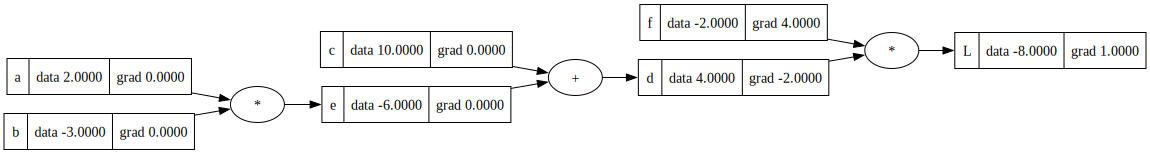

In [27]:
draw_dot(L)

In [28]:
def lol():

    h = 0.0001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0+h, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L2 = L.data

    
    print('Differentiation of L with respect to c',(L2-L1)/h)

lol() 

Differentiation of L with respect to c -1.9999999999953388


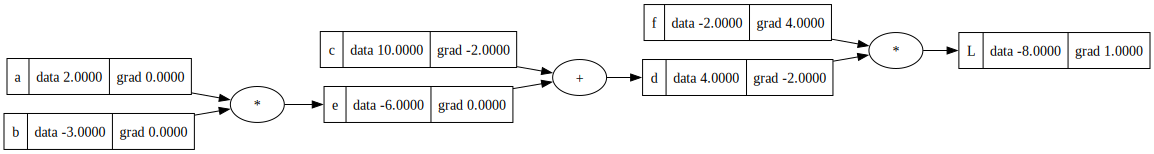

In [29]:
c.grad = -2.0
draw_dot(L)

In [30]:
def lol():

    h = 0.0001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    e.data += h
    d = e+c
    d.label = 'd'
    
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L2 = L.data

    
    print('Differentiation of L with respect to e',(L2-L1)/h)

lol() 

Differentiation of L with respect to e -1.9999999999953388


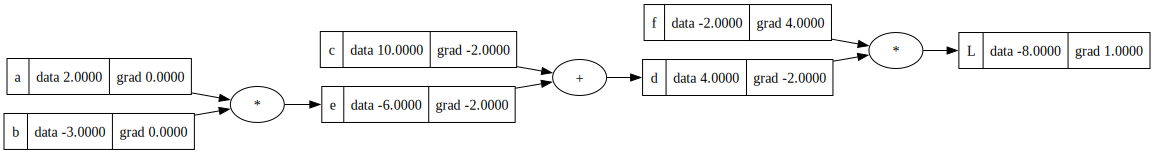

In [31]:
e.grad = -2.0
draw_dot(L)

In [32]:
def lol():

    h = 0.0001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L1 = L.data

    a = Value(2.0+h, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L2 = L.data

    
    print('Differentiation of L with respect to a',(L2-L1)/h)

lol() 

Differentiation of L with respect to a 6.000000000021544


In [33]:
def lol():

    h = 0.0001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0+h, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label = 'e'
    d = e+c
    d.label = 'd'
    
    f = Value(-2.0,label = 'f')
    L = f*d
    L.label = 'L'
    L2 = L.data

    
    print('Differentiation of L with respect to b',(L2-L1)/h)

lol() 

Differentiation of L with respect to b -4.000000000008441


In [34]:
a.grad = 6
b.grad = -4

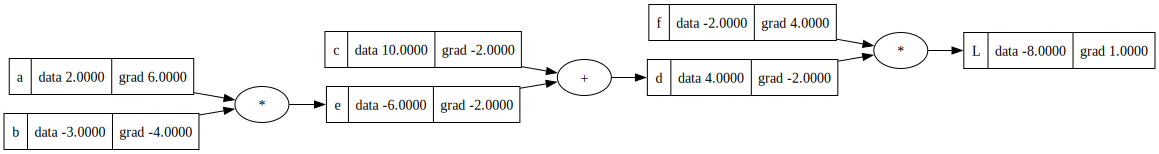

In [35]:
draw_dot(L)

In [36]:
a.data += 0.01 *a.grad
b.data += 0.01 *b.grad
c.data += 0.01 *c.grad
f.data += 0.01 *f.grad

e = a*b
d = e+c
L = d*f

print(L.data) # This value can be changed used the gradient of each neuron
# THe more you run this cell the the value os L will keep on changing

-7.286496


# Creating a nueral network architecture

In [37]:
# input x1,x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weihts w1,w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias of the neuron
b = Value(6.8813735870195432, label = 'b')

# x1w1+x2w2+b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1+x2w2'
n = x1w1x2w2 +b ; n.label = 'n'

# output using an activation function using tanh

o = n.tanh(); o.label = 'o'


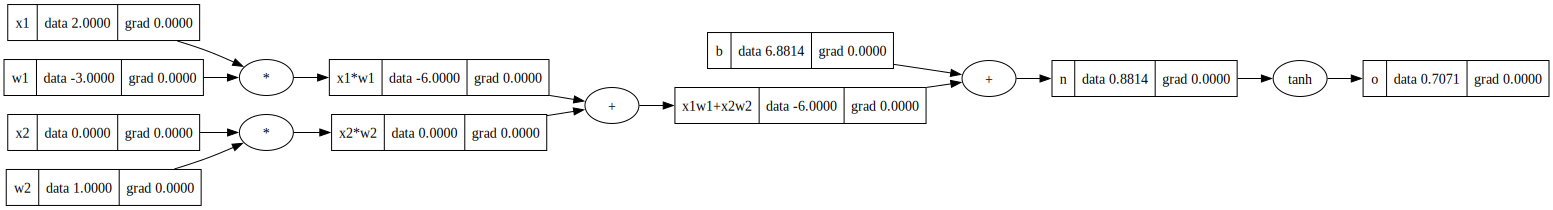

In [38]:
draw_dot(o)

In [39]:
o.grad = 1.0

In [40]:
# o = tanh(n)
# d(tanh(n))/dn = 1-tanh(n)**2 
# d(o)/dn = 1-o**2

In [41]:
n.grad = 1 - o.data**2

In [42]:
# dL/db = (dL/dn)*(dn/db) = dL/dn
b.grad = n.grad
# similarly 
x1w1x2w2.grad = n.grad

In [43]:
# Similary 
x1w1.grad = n.grad
x2w2.grad = n.grad

In [44]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

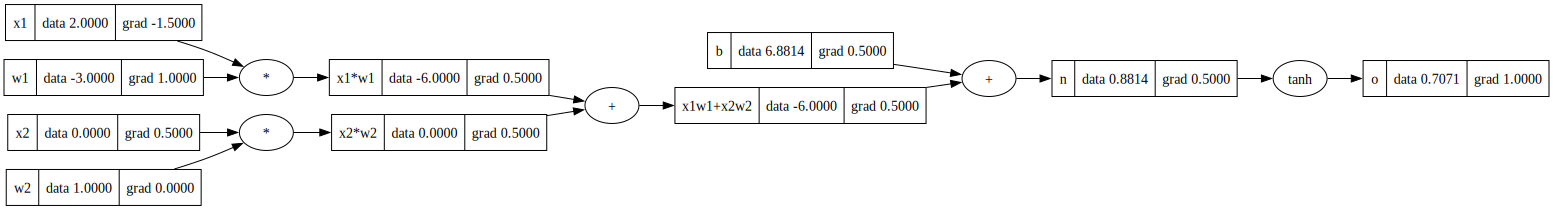

In [45]:
draw_dot(o)

In [46]:
# where ever the  grad is +ve on increase that attribute will will increase the 'o' and vice versa


In [47]:
# input x1,x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weihts w1,w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias of the neuron
b = Value(6.8813735870195432, label = 'b')

# x1w1+x2w2+b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1+x2w2'
n = x1w1x2w2 +b ; n.label = 'n'

# output using an activation function using tanh

o = n.tanh(); o.label = 'o'

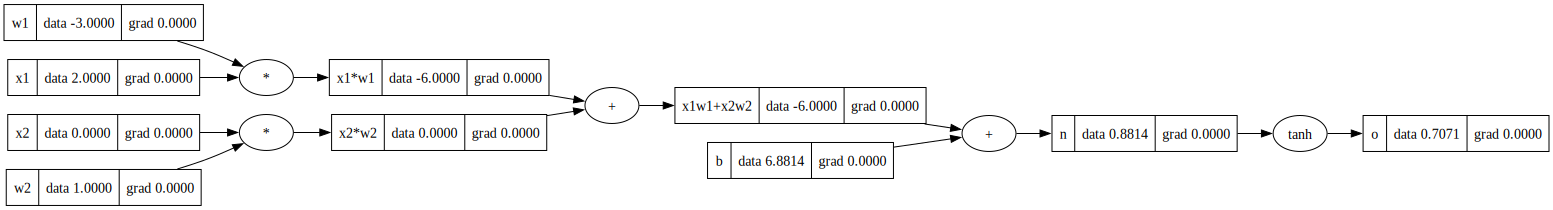

In [48]:
draw_dot(o)

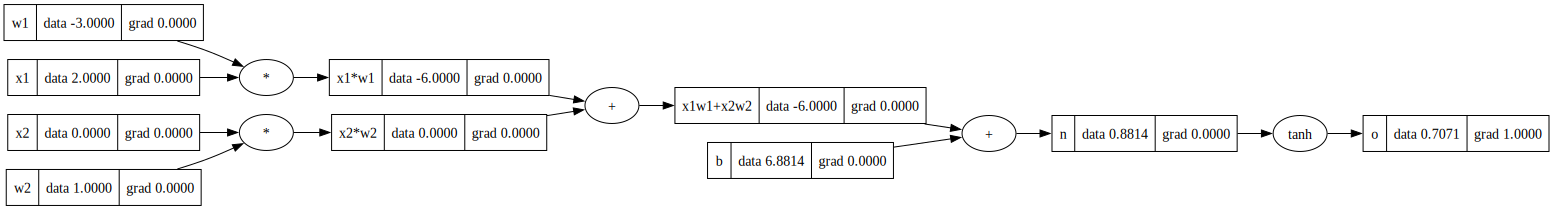

In [49]:
o.grad = 1.
draw_dot(o)

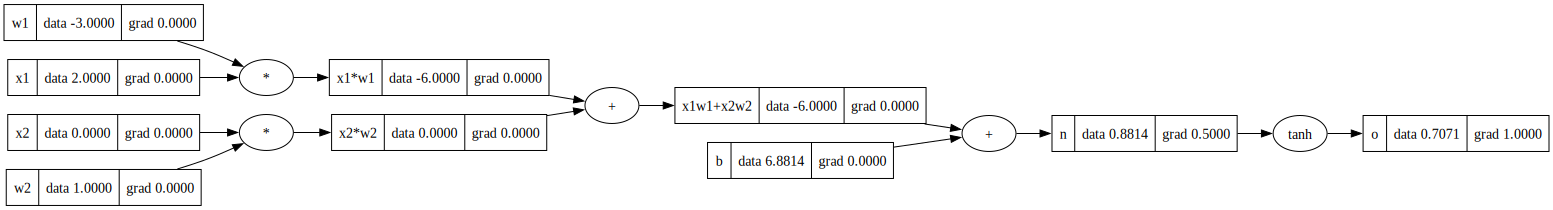

In [50]:
o._backward()
draw_dot(o)

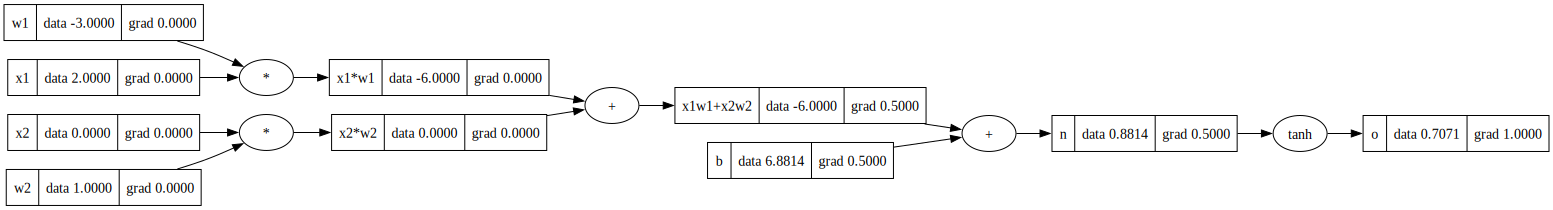

In [51]:
n._backward()
draw_dot(o)

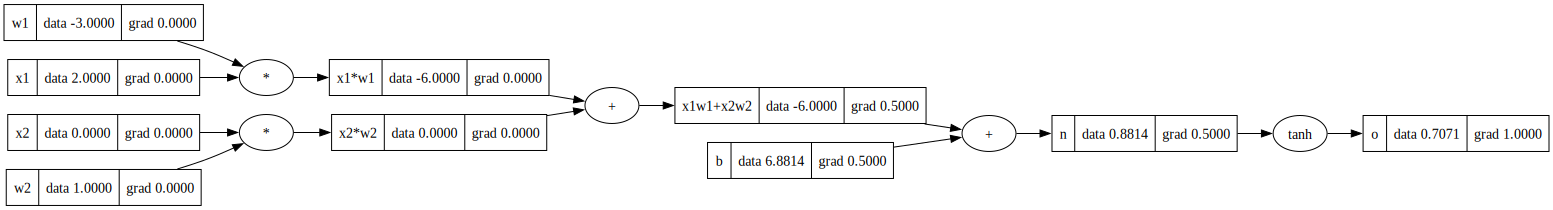

In [52]:
b._backward()
draw_dot(o)

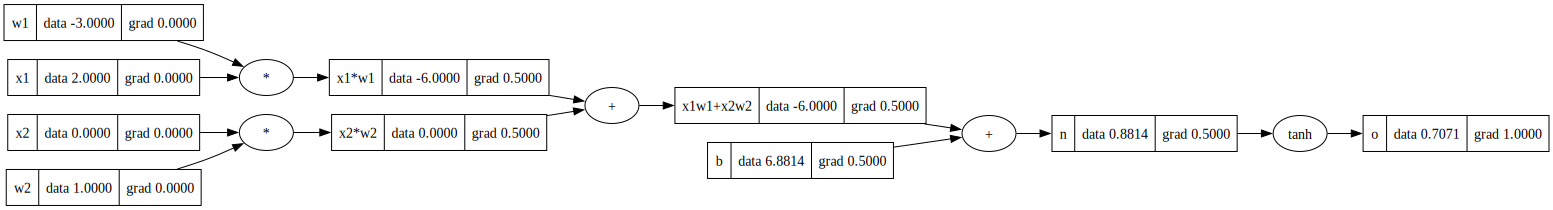

In [53]:
x1w1x2w2._backward()
draw_dot(o)

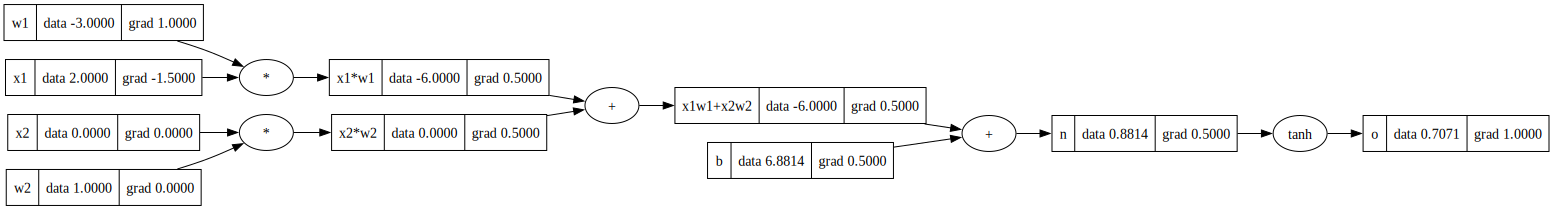

In [54]:
x1w1._backward()
draw_dot(o)

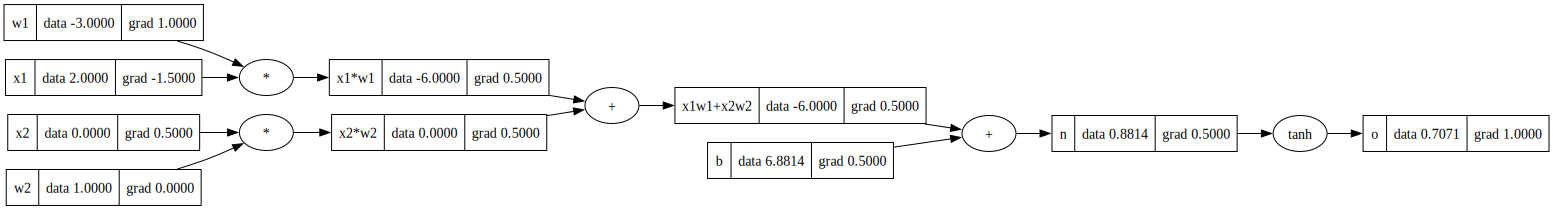

In [55]:
x2w2._backward()
draw_dot(o)

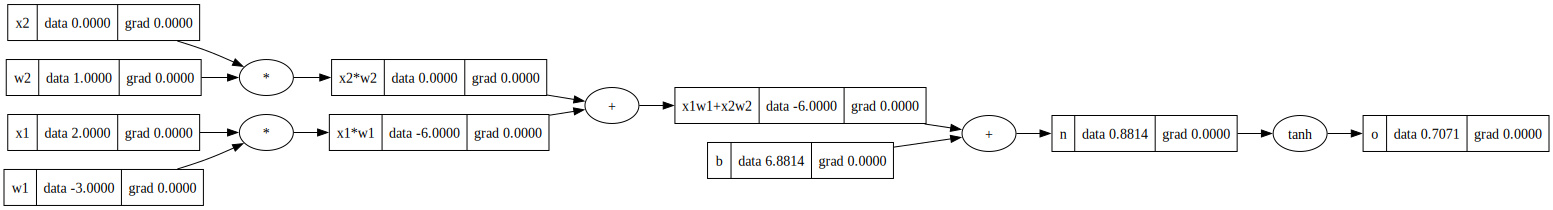

In [56]:
# input x1,x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weihts w1,w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias of the neuron
b = Value(6.8813735870195432, label = 'b')

# x1w1+x2w2+b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1+x2w2'
n = x1w1x2w2 +b ; n.label = 'n'

# output using an activation function using tanh

o = n.tanh(); o.label = 'o'

draw_dot(o)

In [57]:
# Creating a topological sort which can do can backpropagation in a specific order as we wanted
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data = 2.0),
 Value(data = -3.0),
 Value(data = -6.0),
 Value(data = 0.0),
 Value(data = 1.0),
 Value(data = 0.0),
 Value(data = -6.0),
 Value(data = 6.881373587019543),
 Value(data = 0.8813735870195432),
 Value(data = 0.7071067811865476)]

In [58]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
for node in reversed(topo):
    node._backward()

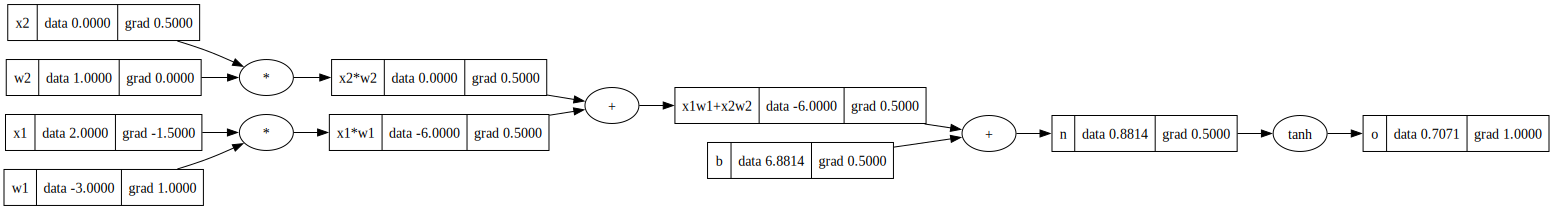

In [59]:
draw_dot(o)

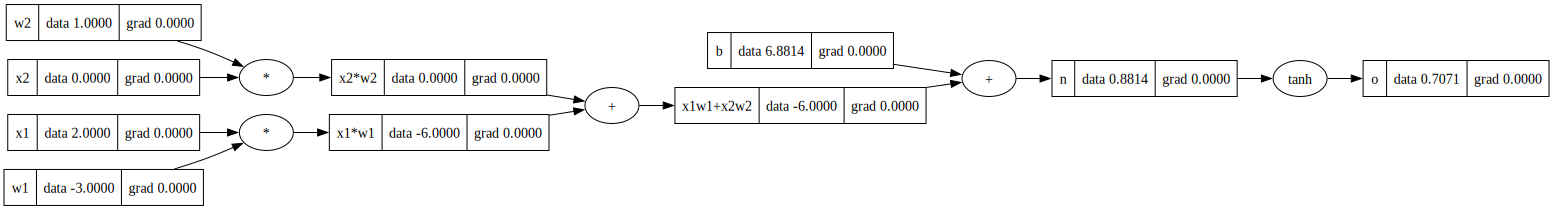

In [60]:
# input x1,x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weihts w1,w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias of the neuron
b = Value(6.8813735870195432, label = 'b')

# x1w1+x2w2+b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1+x2w2'
n = x1w1x2w2 +b ; n.label = 'n'

# output using an activation function using tanh

o = n.tanh(); o.label = 'o'

draw_dot(o)

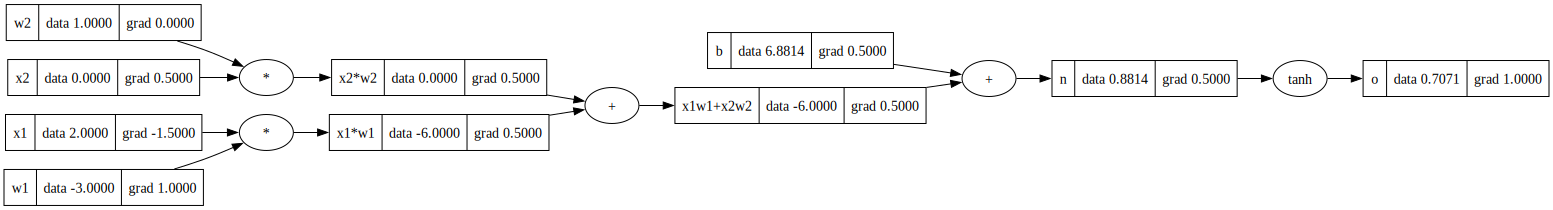

In [61]:
o.backward()
draw_dot(o)

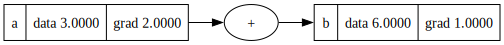

In [63]:
# Now ther is a bug which we can see the in the below example
a = Value(3.0, label = 'a')
b = a+a ; b.label = 'b'
b.backward()
draw_dot(b)
# we may now see the grad 2 but it will be shown as 1 (which is wrong) due to below code